In [42]:
from omegaconf import OmegaConf
from hydra.utils import instantiate
import sys
import os
from matplotlib import pyplot as plt
import numpy as np
os.chdir('/home/jingyan/Documents/sign_language_rgb')
sys.path.append('src')

config = OmegaConf.load('configs/train/x3d_trans.yaml')
# dataset = instantiate(config.data.val_set)
dataset = instantiate(config.data.train_set)


dataset[0]['video'].dtype

torch.float32

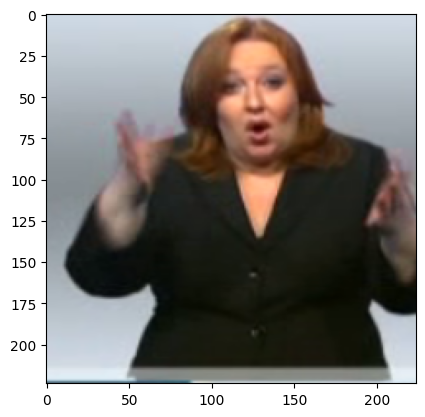

In [43]:
frame = dataset[0]['video'].numpy()
plt.imshow(frame[30])

In [44]:
from PIL import Image
frame0 = (frame[20] * 255).astype('uint8')
frame1 = (frame[21] * 255).astype('uint8')
Image.fromarray(frame0).save('resources/0.jpg')
Image.fromarray(frame1).save('resources/1.jpg')

tensor(0.0005)


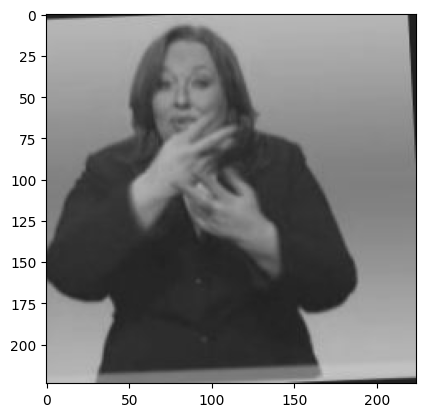

In [23]:
import torchvision.transforms as t
import PIL.Image as Image
import torch

img = Image.open('resources/0.jpg')
img = t.ToTensor()(img)
img = img/255.
img = t.ColorJitter(0.4, 0.4, 0.4, 0.1)(img)
print(img.min())
img = img.numpy().transpose(1, 2, 0) * 255
plt.imshow(img)